In [1]:
# %pip install emr-notebooks-magics

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
3,application_1675098602625_0005,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.uninstall_package('pip')
sc.install_pypi_package("pip==22.3.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Uninstalling pip-9.0.1:
  Successfully uninstalled pip-9.0.1

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)

In [4]:
sc.install_pypi_package("matplotlib==3.5.3", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.4.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.3 MB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)

In [5]:
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)

In [6]:
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.feature import StopWordsRemover

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading data to DataFrames

In [7]:
# insert the URI to the location of the raw XML files on S3

s3BucketURI = ""

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
badgesFile = "preprocessed/Badges.parquet"

dfBadges = spark.read.parquet(s3BucketURI + badgesFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
commentsFile = "preprocessed/Comments.parquet"

dfComments = spark.read.parquet(s3BucketURI + commentsFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
postHistoryFile = "preprocessed/PostHistory.parquet"

dfPostHistory = spark.read.parquet(s3BucketURI + postHistoryFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
postLinksFile = "preprocessed/PostLinks.parquet"

dfPostLinks = spark.read.parquet(s3BucketURI + postLinksFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
postsFile = "preprocessed/Posts.parquet"

dfPosts = spark.read.parquet(s3BucketURI + postsFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
tagsFile = "preprocessed/Tags.parquet"

dfTags = spark.read.parquet(s3BucketURI + tagsFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
usersFile = "preprocessed/Users.parquet"

dfUsers = spark.read.parquet(s3BucketURI + usersFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
votesFile = "preprocessed/Votes.parquet"

dfVotes = spark.read.parquet(s3BucketURI + votesFile)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Distribution of posts in time

In [16]:
postsInTime = dfPosts.groupBy(F.to_date('CreationDate').alias('Date')).count().orderBy('Date').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
postsWIndex = postsInTime.set_index('Date')
postsWIndex.index = pd.to_datetime(postsWIndex.index)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

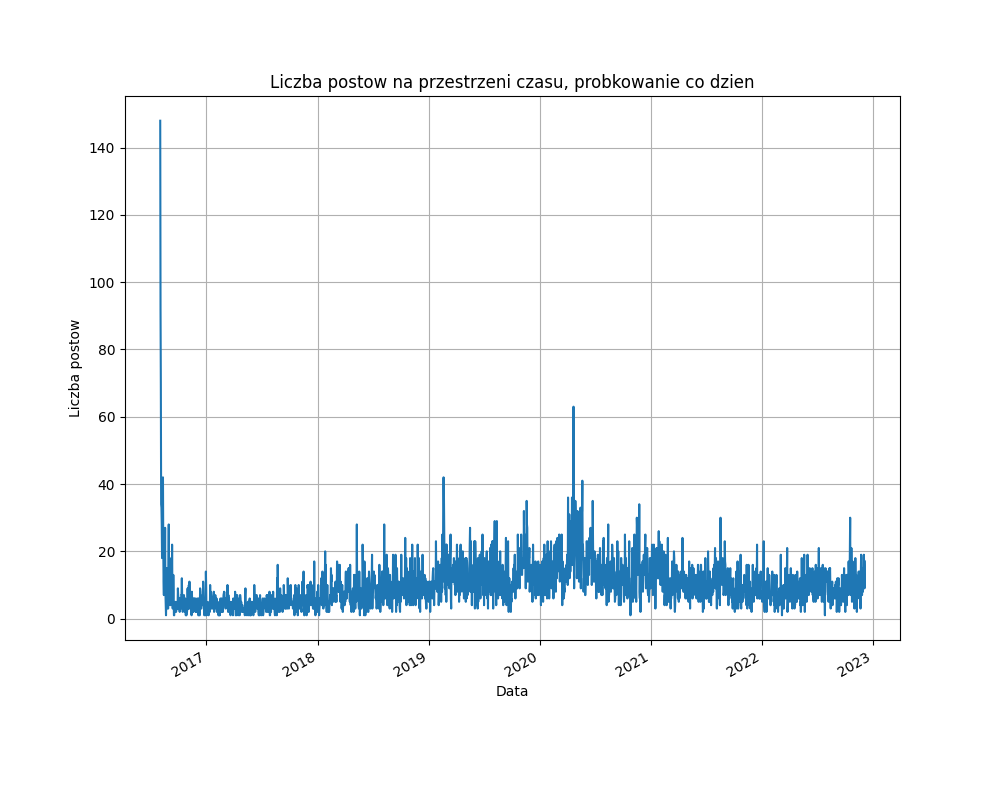

In [18]:
postsWIndex.plot(y="count", figsize=(10, 8), legend=False, grid=True)
plt.xlabel('Data')
plt.ylabel('Liczba postow')
plt.title('Liczba postow na przestrzeni czasu, probkowanie co dzien')
%matplot plt

In [19]:
postsResampled = postsWIndex.resample('1M').sum()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

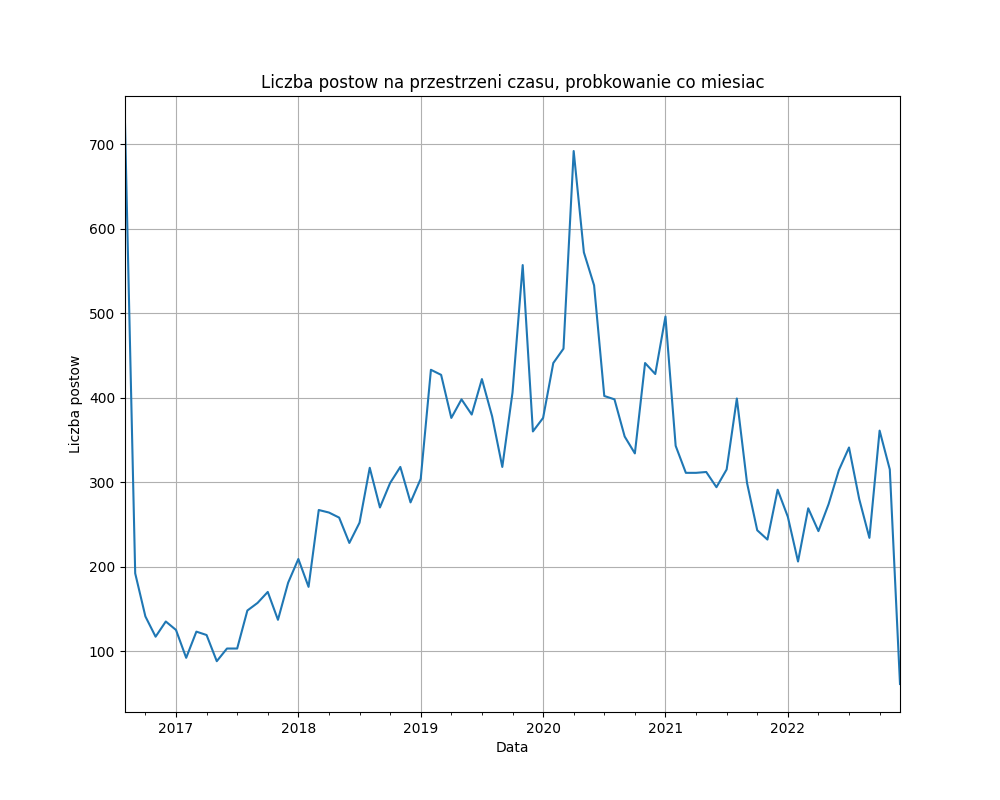

In [20]:
postsResampled.plot(y="count", figsize=(10, 8), legend=False, grid=True)
plt.xlabel('Data')
plt.ylabel('Liczba postow')
plt.title('Liczba postow na przestrzeni czasu, probkowanie co miesiac')
%matplot plt

# Time on forum of 10 most active users

In [21]:
postCountByUser = dfPosts.where(F.col('PostTypeID').isin([1,2]))\
                    .where(F.col('OwnerUserID').isNotNull())\
                    .groupBy('OwnerUserID').count().withColumnRenamed('count', 'PostCount')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
commentCountByUser = dfComments.where(F.col('UserID').isNotNull())\
                    .groupBy('UserID').count().withColumnRenamed('count', 'CommentCount')
commentCountByUserBD = F.broadcast(commentCountByUser)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
totalByUser = postCountByUser.join(commentCountByUserBD, postCountByUser.OwnerUserID == commentCountByUserBD.UserID, 'full')\
                                .fillna(value=0, subset=['PostCount','CommentCount'])\
                                .withColumn('Total', F.col('PostCount') + F.col('CommentCount'))\
                                .select('OwnerUserID', 'Total').orderBy('Total', ascending=False).limit(10)

totalByUserBD = F.broadcast(totalByUser)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
usersList = [data[0] for data in totalByUser.select('OwnerUserID').collect()]
usersList

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[2444, 1847, 1671, 18758, 1641, 36821, 16909, 2193, 34098, 26726]

In [25]:
top10Users1 = dfUsers.join(totalByUserBD, dfUsers.ID == totalByUserBD.OwnerUserID, 'right')\
                    .select('ID', 'DisplayName', 'Total', 'CreationDate')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
windowSpec = Window.partitionBy('OwnerUserID').orderBy('OwnerUserID',
                                                       F.desc('CreationDate'))

latestPost = dfPosts.where(F.col('OwnerUserID').isin(usersList)).withColumn('rn', F.row_number().over(windowSpec))\
                    .filter(F.col('rn')==1).drop(F.col('rn'))\
                    .select(F.col('OwnerUserID').alias('ID'), F.col('CreationDate').alias('LastPostCreationDate'))

latestPostBD = F.broadcast(latestPost)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
windowSpec = Window.partitionBy('UserID').orderBy('UserID',
                                                  F.desc('CreationDate'))

latestComment = dfComments.where(F.col('UserID').isin(usersList)).withColumn('rn', F.row_number().over(windowSpec))\
                    .filter(F.col('rn')==1).drop(F.col('rn'))\
                    .select(F.col('UserID').alias('ID'), F.col('CreationDate').alias('LastCommentCreationDate'))

latestCommentBD = F.broadcast(latestComment)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
top10Users2 = top10Users1.join(latestPostBD, ['ID'], 'full')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
top10Users = top10Users2.join(latestCommentBD, ['ID'], 'full').orderBy('Total', ascending=False)\
                        .withColumn('LastActivityTime', F.greatest(F.col('LastPostCreationDate'), F.col('LastCommentCreationDate')))\
                        .drop('LastPostCreationDate', 'LastCommentCreationDate')\
                        .withColumn('Time on forum', F.unix_timestamp(F.col('LastActivityTime')) - F.unix_timestamp(F.col('CreationDate')))\
                        .limit(10)

top10UsersPD = top10Users.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
top10wActivityPerDay = top10Users.withColumn('Time on forum', (F.col('Time on forum')/86400).cast(IntegerType()))\
            .withColumn('Activity per day', F.round((F.col('Total') / F.col('Time on forum')), 2))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [95]:
top10wActivityPerDay.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----------------+-----+--------------------+--------------------+-------------+----------------+
|   ID|      DisplayName|Total|        CreationDate|    LastActivityTime|Time on forum|Activity per day|
+-----+-----------------+-----+--------------------+--------------------+-------------+----------------+
| 2444|             nbro| 4636|2016-09-15 18:13:...|2022-07-12 15:11:...|         2125|            2.18|
| 1847|      Neil Slater| 2230|2016-08-30 08:06:...|2022-11-28 07:33:...|         2280|            0.98|
| 1671|         DukeZhou|  778|2016-08-24 01:26:...|2021-10-29 23:07:...|         1892|            0.41|
|18758|           hanugm|  548|2018-10-04 13:21:...|2022-08-03 12:09:...|         1398|            0.39|
| 1641|   Dennis Soemers|  459|2016-08-23 10:50:...|2022-12-04 16:06:...|         2294|             0.2|
|36821|    David Ireland|  386|2020-05-07 09:38:...|2022-11-16 11:46:...|          923|            0.42|
|16909|    John Doucette|  374|2018-07-16 18:14:...|202

In [31]:
top10UsersPD['Time on forum (in days)'] = (top10UsersPD['Time on forum'] // 86400)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

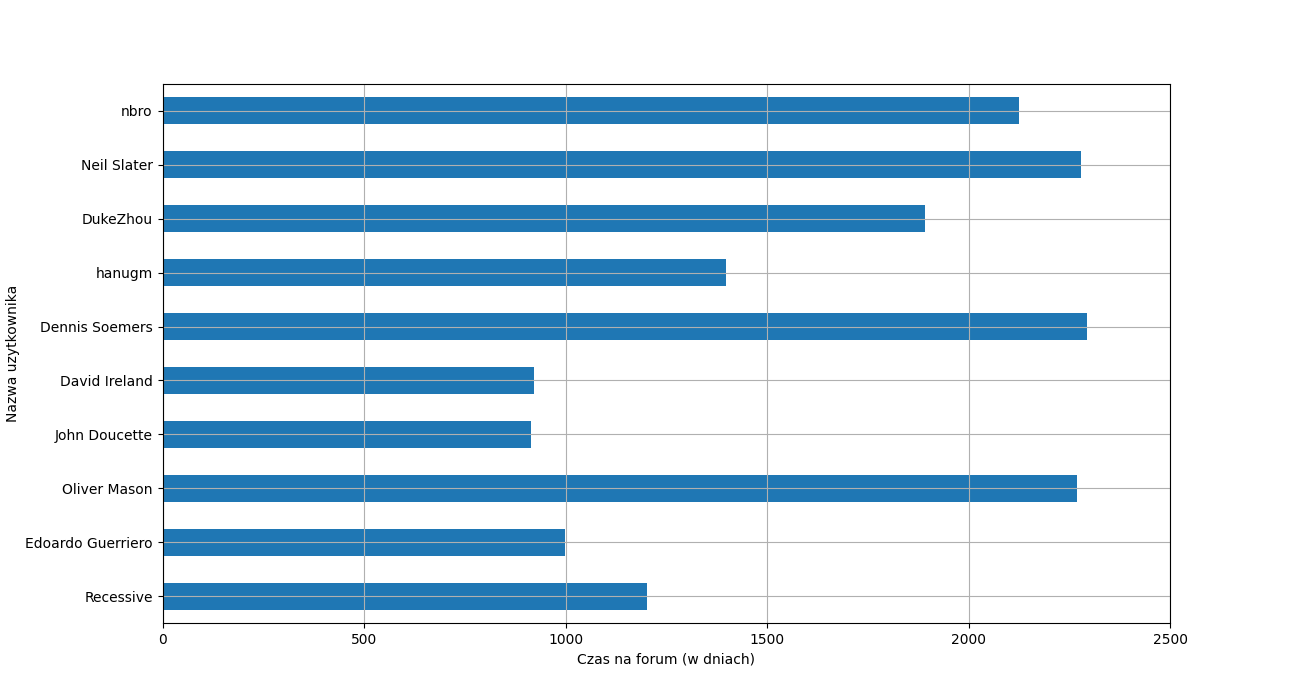

In [32]:
fig, ax = plt.subplots()
top10UsersPD.plot(x='DisplayName',\
                y='Time on forum (in days)',\
                ax=ax,\
                kind='barh',\
                xlim=(0, 2500),\
                legend=False,\
                grid=True,\
                figsize=(13, 7))
plt.ylabel('Nazwa uzytkownika')
plt.xlabel('Czas na forum (w dniach)')
ax.invert_yaxis()
%matplot plt

# Highest and lowest rated questions comparison

In [33]:
highestRated = dfPosts.where(F.col('PostTypeID')==1).orderBy('Score', ascending=False).limit(5).withColumn('PostLength', F.length('Body'))\
        .select('ID', 'Score', 'PostLength', 'Tags', 'AnswerCount')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
highestRated.show(truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-------------------------------------------------------------------------------------------------------------
 ID          | 1768                                                                                                   
 Score       | 175                                                                                                    
 PostLength  | 356                                                                                                    
 Tags        | [philosophy, decision-theory, mythology-of-ai, death]                                                  
 AnswerCount | 12                                                                                                     
-RECORD 1-------------------------------------------------------------------------------------------------------------
 ID          | 111                                                                                                    
 Score       | 100                              

In [35]:
highestStats = highestRated.agg(F.round(F.mean('PostLength'), 2).alias('Mean post length'),\
                F.round(F.stddev('PostLength'), 2).alias('Post length standard deviation'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
highestStats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+------------------------------+
|Mean post length|Post length standard deviation|
+----------------+------------------------------+
|           512.2|                        477.31|
+----------------+------------------------------+

In [37]:
lowestRated = dfPosts.where(F.col('PostTypeID')==1).orderBy('Score').limit(5).withColumn('PostLength', F.length('Body'))\
        .select('ID', 'Score', 'PostLength', 'Tags', 'AnswerCount')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
lowestRated.show(truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------------------
 ID          | 225                                                                                                               
 Score       | -4                                                                                                                
 PostLength  | 388                                                                                                               
 Tags        | [reference-request, recurrent-neural-networks, algorithm-request, sequence-modeling, model-request]               
 AnswerCount | 2                                                                                                                 
-RECORD 1------------------------------------------------------------------------------------------------------------------------
 ID          | 1480                                                                       

In [39]:
lowestStats = lowestRated.agg(F.round(F.mean('PostLength'), 2).alias('Mean post length'),\
                F.round(F.stddev('PostLength'), 2).alias('Post length standard deviation'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
lowestStats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+------------------------------+
|Mean post length|Post length standard deviation|
+----------------+------------------------------+
|          1104.2|                       1205.82|
+----------------+------------------------------+

In [41]:
mostAnswered = dfPosts.where(F.col('PostTypeID')==1).orderBy('AnswerCount', ascending=False).limit(5).withColumn('PostLength', F.length('Body'))\
        .select('ID', 'Score', 'PostLength', 'Tags', 'AnswerCount')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
mostAnswered.show(truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-----------------------------------------------------------------
 ID          | 15730                                                      
 Score       | 45                                                         
 PostLength  | 1836                                                       
 Tags        | [deep-learning, philosophy, agi]                           
 AnswerCount | 19                                                         
-RECORD 1-----------------------------------------------------------------
 ID          | 111                                                        
 Score       | 100                                                        
 PostLength  | 1318                                                       
 Tags        | [philosophy, ethics, autonomous-vehicles, decision-theory] 
 AnswerCount | 14                                                         
-RECORD 2-----------------------------------------------------------------
 ID          | 2111      

In [43]:
mostAnsweredStats = mostAnswered.agg(F.round(F.mean('PostLength'), 2).alias('Mean post length'),\
                F.round(F.stddev('PostLength'), 2).alias('Post length standard deviation'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
mostAnsweredStats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+------------------------------+
|Mean post length|Post length standard deviation|
+----------------+------------------------------+
|           805.6|                        733.14|
+----------------+------------------------------+

# Percent of cases where highest rated answer is not the accepted answer

In [45]:
dfAnswers = dfPosts.where(dfPosts.PostTypeID == 2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
acceptedAnswers = dfPosts.where((dfPosts.PostTypeID == 1) & (dfPosts.AcceptedAnswerID.isNotNull()))\
                        .select(F.col('AcceptedAnswerID').alias('ID'))

acceptedAnswersBD = F.broadcast(acceptedAnswers)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
answersFlagged = dfAnswers.join(acceptedAnswersBD.withColumn('IsAccepted', F.lit(True)), 'ID', 'left')\
            .fillna(False).select('ID', 'PostTypeID', 'ParentID', 'Score', 'IsAccepted')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
windowSpec = Window.partitionBy('ParentID').orderBy(F.desc('Score'),
                                                    F.desc('IsAccepted'))

highestOnly = answersFlagged.withColumn('rn', F.row_number().over(windowSpec)).filter(F.col('rn') == 1).drop(F.col('rn'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
percent = highestOnly.filter(F.col('IsAccepted') == False).count() / highestOnly.count() * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
print(f'The highest rated answer is not the accepted answer in {percent:.2f}% of cases.')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The highest rated answer is not the accepted answer in 51.97% of cases.

# Score distribution of accepted vs non accepted answers

In [51]:
answStats = answersFlagged.groupBy('IsAccepted').agg(F.count(F.col('IsAccepted')).alias('Number of answers'),\
                                         F.round(F.mean('Score'), 2).alias('Mean score'),\
                                         F.round(F.stddev('Score'), 2).alias('Standard deviation'),\
                                         F.expr('percentile_approx(Score, 0.5)').alias('Median score'),\
                                         F.min('Score').alias('Min score'),\
                                         F.max('Score').alias('Max score'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
answStats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+----------+------------------+------------+---------+---------+
|IsAccepted|Number of answers|Mean score|Standard deviation|Median score|Min score|Max score|
+----------+-----------------+----------+------------------+------------+---------+---------+
|      true|             3630|      3.11|              5.68|           2|       -2|      146|
|     false|             6945|      1.79|              2.95|           1|       -3|       62|
+----------+-----------------+----------+------------------+------------+---------+---------+

In [53]:
acc = answersFlagged.where(F.col('IsAccepted') == True).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

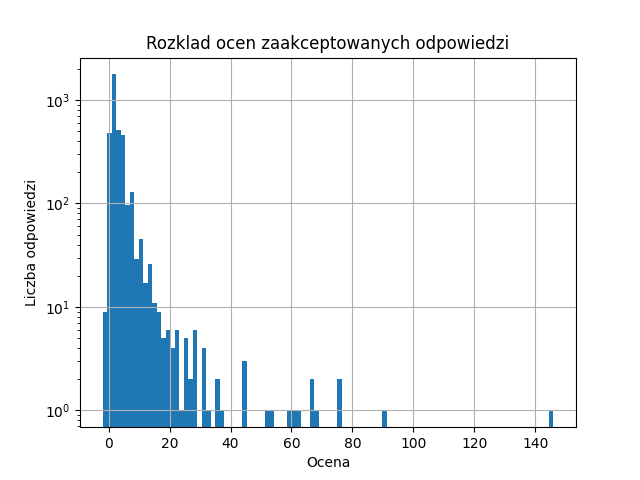

In [54]:
acc.hist(column='Score', bins=100)
plt.xlabel('Ocena')
plt.ylabel('Liczba odpowiedzi')
plt.title('Rozklad ocen zaakceptowanych odpowiedzi')
plt.semilogy()
%matplot plt

In [55]:
acc2 = acc[acc['Score'] <= 20]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

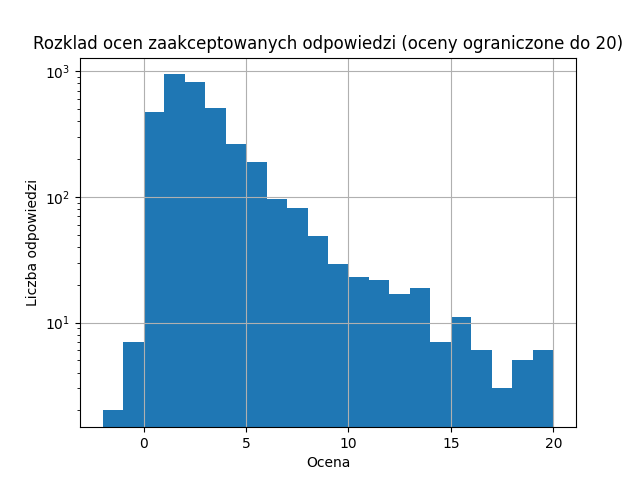

In [56]:
acc2.hist(column='Score', bins=22)
plt.xlabel('Ocena')
plt.ylabel('Liczba odpowiedzi')
plt.title('Rozklad ocen zaakceptowanych odpowiedzi (oceny ograniczone do 20)')
plt.semilogy()
%matplot plt

In [57]:
nonAcc = answersFlagged.where(F.col('IsAccepted') == False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

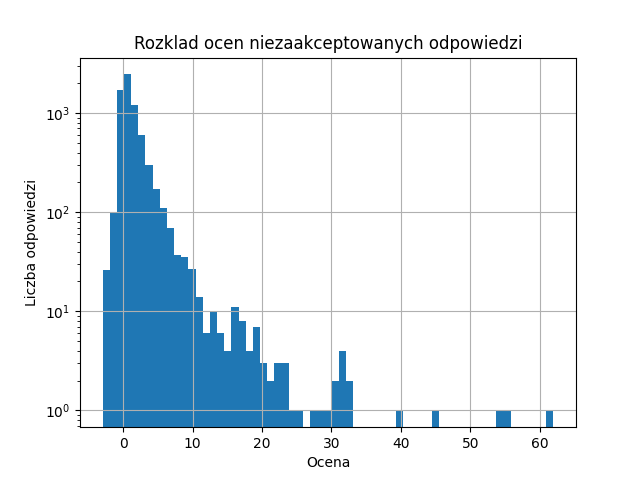

In [58]:
nonAcc.hist(column='Score', bins=63)
plt.xlabel('Ocena')
plt.ylabel('Liczba odpowiedzi')
plt.title('Rozklad ocen niezaakceptowanych odpowiedzi')
plt.semilogy()
%matplot plt

In [59]:
nonAcc2 = nonAcc[nonAcc['Score'] <= 20]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

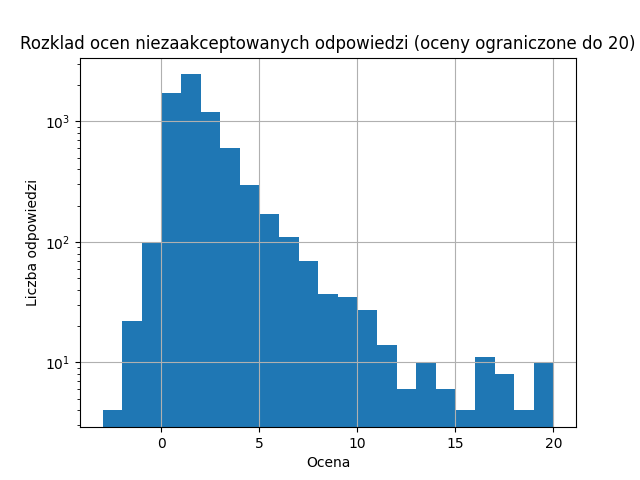

In [60]:
nonAcc2.hist(column='Score', bins=23)
plt.xlabel('Ocena')
plt.ylabel('Liczba odpowiedzi')
plt.title('Rozklad ocen niezaakceptowanych odpowiedzi (oceny ograniczone do 20)')
plt.semilogy()
%matplot plt

# Top 5 tags that generated the most views

In [61]:
top5Tags = dfPosts.select('ViewCount',F.explode(F.col('Tags')).alias('Tag')).groupBy(F.col('Tag'))\
                .agg(F.sum("ViewCount").alias("Sum of Views")).orderBy(F.col('Sum of Views'), ascending=False).limit(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
top5Tags.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+------------+
|Tag                   |Sum of Views|
+----------------------+------------+
|neural-networks       |1845698     |
|machine-learning      |1551283     |
|deep-learning         |1240192     |
|reinforcement-learning|1212097     |
|comparison            |1080161     |
+----------------------+------------+

# Distribution of posts in time for top 5 tags

In [63]:
tagsList = [data[0] for data in top5Tags.select('Tag').collect()]
tagsList

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['neural-networks', 'machine-learning', 'deep-learning', 'reinforcement-learning', 'comparison']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

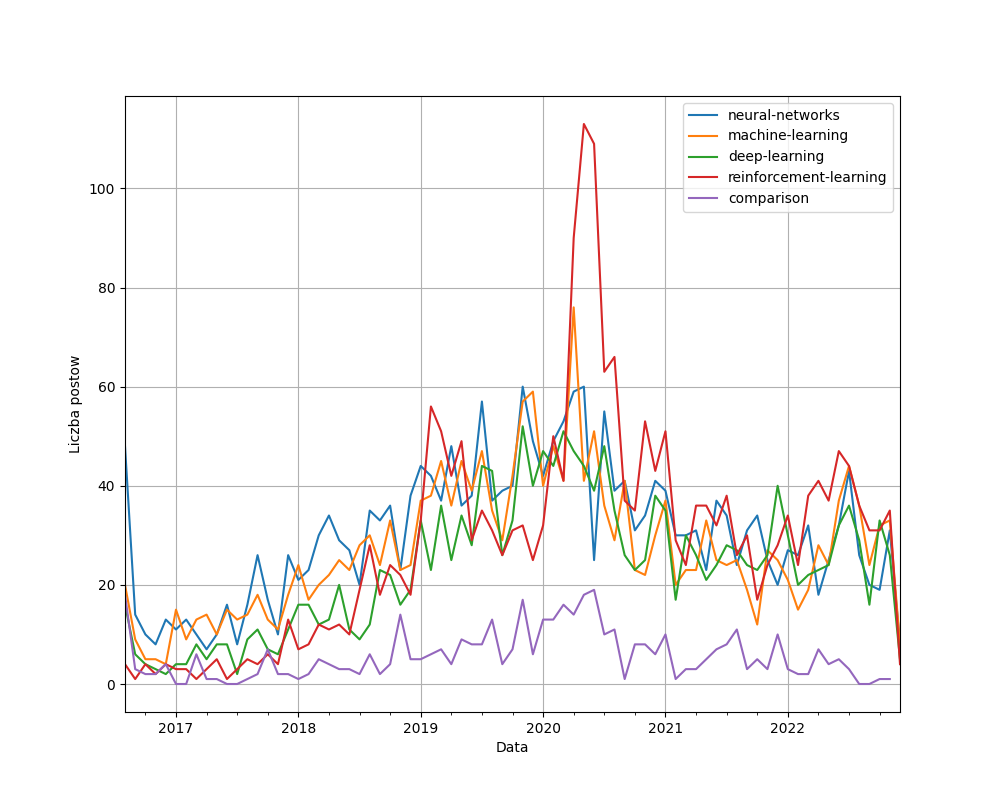

In [64]:
fig, ax = plt.subplots()

for tag in tagsList:
    tgPostsInTime = dfPosts.where(F.array_contains(F.col('Tags'), tag)).groupBy(F.to_date('CreationDate').alias('Date'))\
                    .count().orderBy(F.col('Date')).toPandas()

    tgWIndex = tgPostsInTime.set_index('Date')
    tgWIndex.index = pd.to_datetime(tgWIndex.index)
    tgResampled = tgWIndex.resample('1M').sum()

    tgResampled.rename(columns={
        'count': tag
    }).plot(ax=ax,
            y=tag,
            ylabel='Liczba postow',
            figsize=(10, 8),
            legend=True,
            grid=True)
plt.xlabel('Data')
%matplot plt

In [65]:
dfPosts.select('ViewCount',F.explode(F.col('Tags')).alias('Tag')).groupBy(F.col('Tag'))\
                .agg(F.sum("ViewCount").alias("Sum of Views"), F.count(F.col('Tag')).alias('Post Count'))\
                .orderBy(F.col('Sum of Views'), ascending=False).limit(5)\
                .withColumn('Views per Post', F.round((F.col('Sum of Views') / F.col('Post Count')), 2)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+----------+--------------+
|                 Tag|Sum of Views|Post Count|Views per Post|
+--------------------+------------+----------+--------------+
|     neural-networks|     1845698|      2333|        791.13|
|    machine-learning|     1551283|      2100|        738.71|
|       deep-learning|     1240192|      1804|        687.47|
|reinforcement-lea...|     1212097|      2200|        550.95|
|          comparison|     1080161|       430|        2512.0|
+--------------------+------------+----------+--------------+

# Most used words in titles

In [66]:
stopWords = StopWordsRemover.loadDefaultStopWords("english")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
wordCount = dfPosts.where(F.col('Title').isNotNull()).withColumn('WordsInTitle', F.explode(\
                                                                                 F.split(\
                                                                                 F.lower(\
                                                                                 F.regexp_replace(\
                                                                                 F.regexp_replace(\
                                                                                 F.col('Title'), '[^a-zA-Z ]', '')\
                                                                                                , '\s+', ' '))\
                                                                                                 , ' ')))\
            .filter(~F.col('WordsInTitle').isin(stopWords)).groupBy(F.col('WordsInTitle')).count().orderBy('count', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
wordCount.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
| WordsInTitle|count|
+-------------+-----+
|     learning| 1311|
|       neural| 1207|
|      network|  961|
|        model|  658|
|           ai|  605|
|         data|  577|
|          use|  571|
|     function|  538|
|     networks|  512|
|     training|  507|
|        using|  503|
|    algorithm|  436|
|reinforcement|  431|
|         deep|  421|
|         used|  364|
|        image|  363|
|         loss|  344|
|       policy|  333|
|      problem|  317|
|      machine|  295|
+-------------+-----+
only showing top 20 rows

# Percentage of users who never posted

In [69]:
totalUsers = dfUsers.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [70]:
usersPostedCount = dfPosts.where(F.col('PostTypeID').isin([1,2])).select('OwnerUserID')\
                          .distinct().where(F.col('OwnerUserID').isNotNull()).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [71]:
nonPostersPercentage = (totalUsers - usersPostedCount) / totalUsers * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
print(f'{nonPostersPercentage:.2f}% of users have never posted.')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

86.79% of users have never posted.

# Mean time from post creation to an accepted answer

In [73]:
poststWithAccAnsw = dfPosts.where((F.col('PostTypeID') == 1) & F.col('AcceptedAnswerID').isNotNull()).alias('posts1')\
                            .join(dfPosts.alias('posts2'), F.col('posts1.AcceptedAnswerID') == F.col('posts2.ID'), 'inner')\
                            .select(F.col('posts1.ID'), F.col('posts1.CreationDate').alias('PostCreationDate'),\
                                    F.col('posts1.AcceptedAnswerID'), F.col('posts2.CreationDate').alias('AcceptedAnswerDate'))\
                            .withColumn('TimeDifference', F.unix_timestamp(F.col('AcceptedAnswerDate')) - F.unix_timestamp(F.col('PostCreationDate')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [74]:
timeStats = poststWithAccAnsw.agg(F.round(F.mean('TimeDifference')/3600, 2).alias('Mean time difference in hours'),\
                                 F.round(F.mean('TimeDifference')/86400, 2).alias('Mean time difference in days'),\
                                 F.round(F.expr('percentile_approx(TimeDifference, 0.5)')/3600, 2).alias('Median time difference in hours'),\
                                 F.round(F.expr('percentile_approx(TimeDifference, 0.5)')/86400, 2).alias('Median time difference in days'))
timeStats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------+----------------------------+-------------------------------+------------------------------+
|Mean time difference in hours|Mean time difference in days|Median time difference in hours|Median time difference in days|
+-----------------------------+----------------------------+-------------------------------+------------------------------+
|                       416.83|                       17.37|                           8.32|                          0.35|
+-----------------------------+----------------------------+-------------------------------+------------------------------+

In [75]:
accAnswPD = poststWithAccAnsw.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [76]:
accAnswPD['TimeDifference'] = accAnswPD['TimeDifference'] / 86400

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

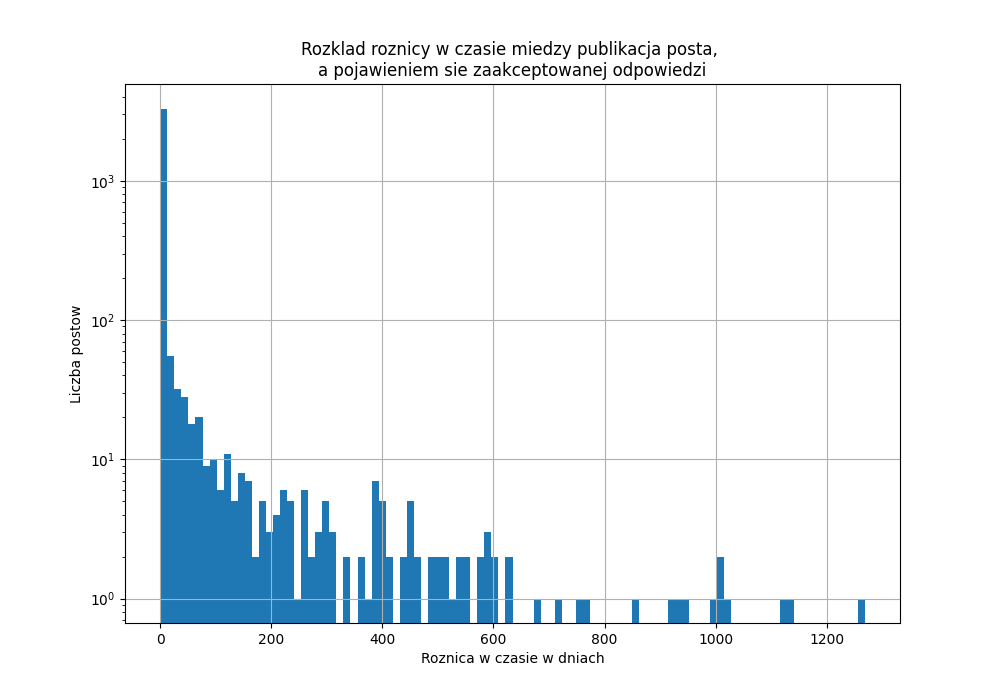

In [77]:
accAnswPD.hist(column='TimeDifference', bins=100, figsize=(10,7))
plt.xlabel('Roznica w czasie w dniach')
plt.ylabel('Liczba postow')
plt.title('Rozklad roznicy w czasie miedzy publikacja posta, \na pojawieniem sie zaakceptowanej odpowiedzi')
plt.semilogy()
%matplot plt

In [78]:
accAnswPD2 = accAnswPD[accAnswPD['TimeDifference'] <= 50]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

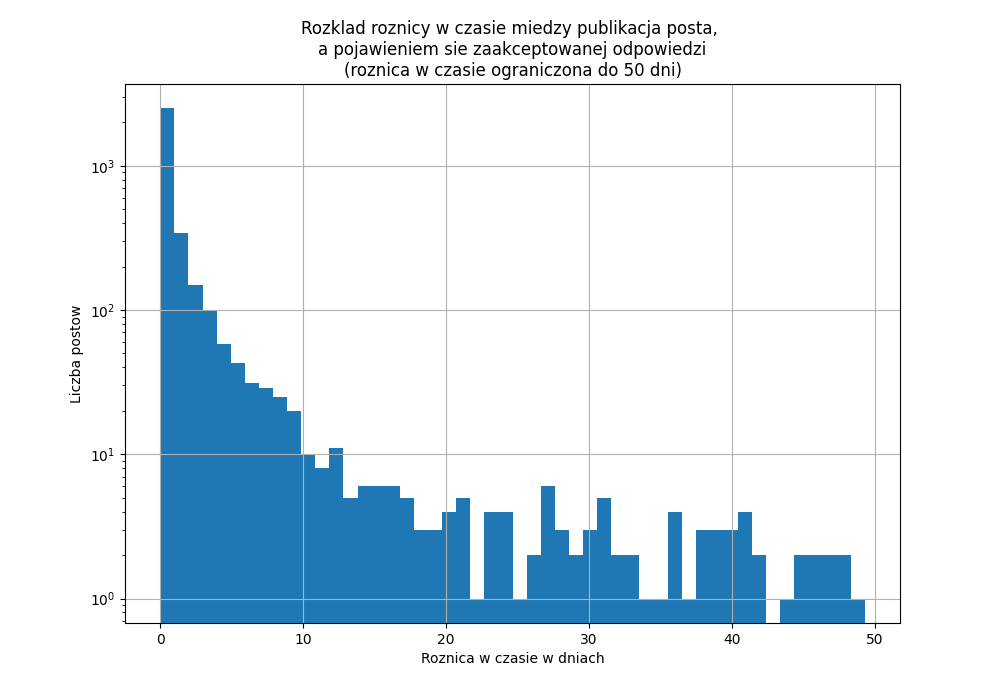

In [79]:
accAnswPD2.hist(column='TimeDifference', bins=50, figsize=(10,7))
plt.xlabel('Roznica w czasie w dniach')
plt.ylabel('Liczba postow')
plt.title('Rozklad roznicy w czasie miedzy publikacja posta, \na pojawieniem sie zaakceptowanej odpowiedzi\n(roznica w czasie ograniczona do 50 dni)')
plt.semilogy()
%matplot plt